In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import tensorflow as tf
import os, sys, time
os.environ["CUDA_VISIBLE_DEVICES"]=""
import utils, optimization, metrics, plot, data

# Parameters

In [3]:
ns = 64
nsamples = 1000
k = 10

# Data handling

Load the data

In [4]:
images, raw_images = data.load_samples(nsamples = nsamples, permute=True, k=k)
images = data.make_smaller_samples(images, ns)
raw_images = data.make_smaller_samples(raw_images, ns)   

Select 1000 samples out of 15000.


# A) Load the model

In [30]:
import pickle
from model import *
from gan import *

try:
    del(params)
    del(obj)
except:
    pass

checkpoints = None


pathgan = '../../saved_result/WGAN64_2018_2_12_18_3checkpoints/'
checkpoints = '152600'



with open(pathgan+'params.pkl', 'rb') as f:
    params = pickle.load(f)
obj = GAN(params)


Generator 
------------------------------------------------------------
     The input is of size (?, 100)
     0 Full layer with 1024 outputs
         Size of the variables: (?, 1024)
     Reshape to (?, 4, 4, 64)
     1 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 8, 8, 64)
     2 Deconv layer with 256 channels
         Batch norm
         Size of the variables: (?, 16, 16, 256)
     3 Deconv layer with 128 channels
         Batch norm
         Size of the variables: (?, 32, 32, 128)
     4 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 64, 64, 64)
     5 Deconv layer with 1 channels
         Size of the variables: (?, 64, 64, 1)
    Non lienarity: tanh
     The output is of size (?, 64, 64, 1)
------------------------------------------------------------

Discriminator 
------------------------------------------------------------
     The input is of size (?, 64, 64, 1)
     0 Conv layer with 16 channels


# Generate some samples

In [31]:
N = 1000

if checkpoints is None:
    gen_sample, gen_sample_raw = obj.generate(N=N)
else:
    file_name = pathgan+obj.model_name+'-'+checkpoints
    
    gen_sample, gen_sample_raw = obj.generate(N=N, file_name=file_name)

gen_sample = np.squeeze(gen_sample)
gen_sample_raw = np.squeeze(gen_sample_raw)



 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ../../saved_result/WGAN64_2018_2_12_18_3checkpoints/WGAN64-152600


INFO:tensorflow:Restoring parameters from ../../saved_result/WGAN64_2018_2_12_18_3checkpoints/WGAN64-152600


Print a few samples

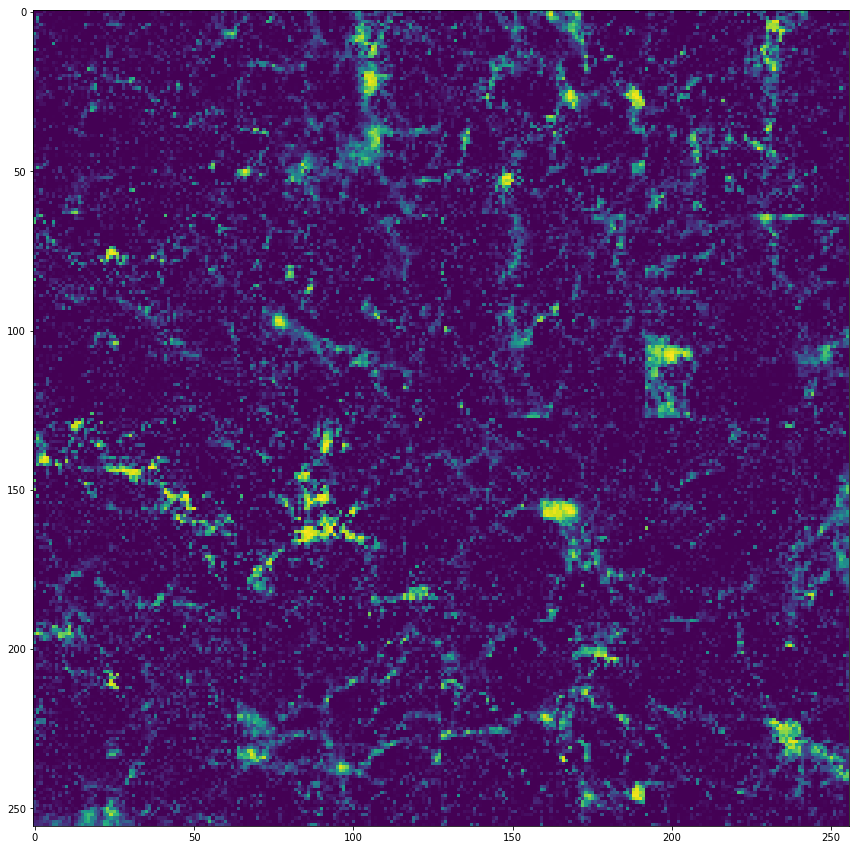

In [32]:
plt.figure(figsize=(15,15))
utils.draw_images(gen_sample,nx=4,ny=4,px=ns,py=ns)

# Evaluate the model

Compute the real PSD over all samples

In [33]:

psd_real, x = metrics.power_spectrum_batch_phys(X1=raw_images)
psd_real_mean = np.mean(psd_real, axis=0)

Pool with 4 workers


In [34]:

psd_gen, x = metrics.power_spectrum_batch_phys(X1=gen_sample_raw)
psd_gen_mean = np.mean(psd_gen, axis=0)    
e = psd_real_mean - psd_gen_mean
l2 = np.mean(e*e)
l1 = np.mean(np.abs(e))
loge = 10*(log10(psd_real_mean+1e-5) - log10(psd_gen_mean+1e-5))
logel2 = np.mean(loge*loge)
logel1 = np.mean(np.abs(loge))



Pool with 4 workers


In [35]:
print('Log l2 PSD loss: {}\nL2 PSD loss: {}\nLog l1 PSD loss: {}\nL1 PSD loss: {}'.format(logel2, l2, logel1, l1))

Log l2 PSD loss: 0.4068868743419847
L2 PSD loss: 4553.902330893631
Log l1 PSD loss: 0.41819124702465305
L1 PSD loss: 60.76037234058957


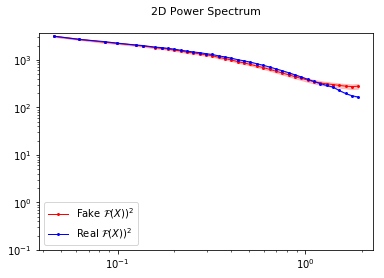

In [36]:
fig = plt.Figure()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
linestyle = {"linewidth": 1, "markeredgewidth": 0, "markersize": 3, "marker": "o", "linestyle": "-"}

plot.plot_with_shade(ax, x, psd_gen, color='r', label="Fake $\mathcal{F}(X))^2$", **linestyle)
plot.plot_with_shade(ax, x, psd_real, color='b', label="Real $\mathcal{F}(X))^2$", **linestyle)
ax.set_ylim(bottom=0.1)
ax.title.set_text("2D Power Spectrum\n")
ax.title.set_fontsize(11)
ax.tick_params(axis='both', which='major', labelsize=10)
_ = ax.legend()


In [1]:
import numpy as np

In [14]:
x = np.random.rand(3,3,2)

In [15]:
x

array([[[  5.39406255e-01,   5.95246723e-01],
        [  4.50685151e-04,   8.56256007e-02],
        [  3.65729630e-01,   3.80852237e-01]],

       [[  5.30608367e-01,   6.30993220e-01],
        [  4.57382369e-01,   8.85943941e-01],
        [  8.91139369e-01,   9.82072399e-01]],

       [[  2.63215081e-01,   5.59246352e-01],
        [  1.43739093e-01,   9.80797667e-01],
        [  6.22485910e-02,   7.71828244e-01]]])

In [17]:
for e in npgen(x):
    print(e)

[[  5.39406255e-01   5.95246723e-01]
 [  4.50685151e-04   8.56256007e-02]
 [  3.65729630e-01   3.80852237e-01]]
[[ 0.53060837  0.63099322]
 [ 0.45738237  0.88594394]
 [ 0.89113937  0.9820724 ]]
[[ 0.26321508  0.55924635]
 [ 0.14373909  0.98079767]
 [ 0.06224859  0.77182824]]
